In [1]:
#import the libraries
import pandas as pd
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM ,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#MACRO DEF

STOCK = 'FB'
EPOCHS = 100
model_path = 'machine learning model/'+STOCK+'_model.pkl'
START_DATE = '2012-01-01'
END_DATE = '2022-03-04'
PREDICT_DATE = '2022-03-07'
ERR_EPOCHS = 120

In [3]:


#get the stock data
df = web.DataReader(STOCK, data_source='yahoo' , start=START_DATE , end=END_DATE)

#show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2022-02-28,213.149994,206.830002,207.679993,211.029999,34239800,211.029999
2022-03-01,211.750000,202.220001,209.869995,203.490005,27094900,203.490005
2022-03-02,209.149994,202.020004,204.779999,208.110001,29452100,208.110001


In [4]:
#get the number of rows and column in the data set
df.shape

(2465, 6)

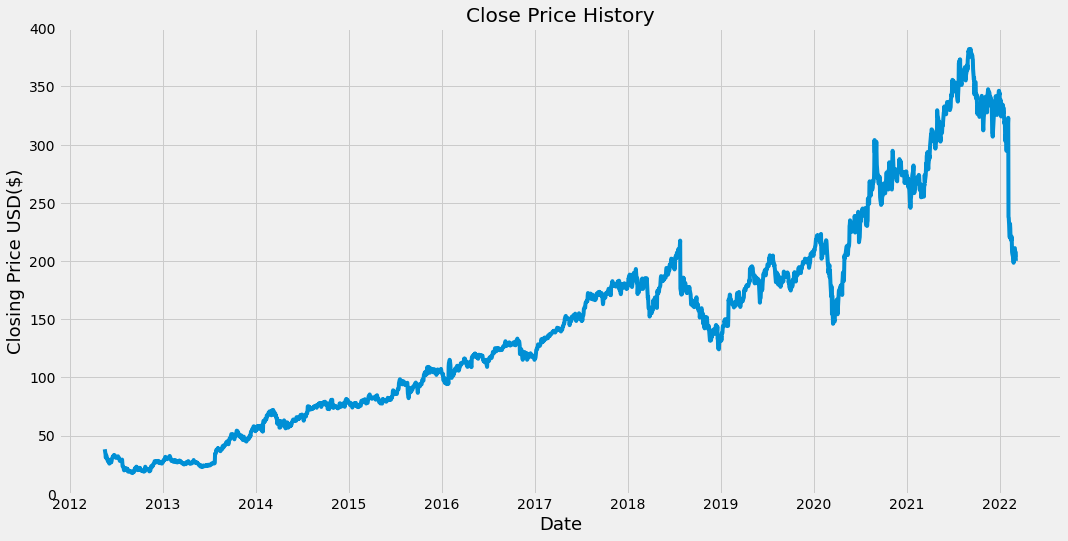

In [5]:
#Visualing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD($)', fontsize=18)
plt.show()

In [6]:
#Create a new data
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1972

In [7]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05624914],
       [0.04472493],
       [0.03641103],
       ...,
       [0.5223762 ],
       [0.50827275],
       [0.50028811]])

In [8]:
#creating the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.05624914, 0.04472493, 0.03641103, 0.03915489, 0.04198107,
       0.03890795, 0.03048429, 0.02870079, 0.03256963, 0.02741117,
       0.0251612 , 0.02233503, 0.02491425, 0.02354232, 0.02570998,
       0.02546303, 0.02653313, 0.02617643, 0.02897517, 0.03369461,
       0.03753601, 0.03890795, 0.03805735, 0.03871588, 0.04203594,
       0.03931953, 0.04217314, 0.03978598, 0.03739882, 0.03668542,
       0.03577995, 0.03695981, 0.03770064, 0.03841405, 0.03962134,
       0.03770064, 0.03632871, 0.0358897 , 0.03564275, 0.02886542,
       0.0284264 , 0.03122514, 0.03092331, 0.03026479, 0.03023735,
       0.02941419, 0.03185622, 0.02502401, 0.01640829, 0.01487173,
       0.01092056, 0.00864316, 0.00633832, 0.00921937, 0.01149678,
       0.00820414, 0.00820414, 0.00899986, 0.01119495, 0.01061874])]
[0.007271229711778966]

[array([0.05624914, 0.04472493, 0.03641103, 0.03915489, 0.04198107,
       0.03890795, 0.03048429, 0.02870079, 0.03256963, 0.02741117,
       0.0251612 , 0.02233503, 0.0

In [9]:
#Convert the X_train and Y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1912, 60, 1)

In [11]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))

#adding a fourth fifth layer and some Dropout regularistion
model.add(LSTM(units = 50, return_sequences = False))

model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
'''for i in range(10):
    model.fit(x_train, y_train, batch_size=32, epochs=i)
    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    #convert the data to a numpy array
    x_test = np.array(x_test)
    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the models predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    print(rmse)
    #plot the date
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    #visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    print(valid)'''
    
    
    

    

"for i in range(10):\n    model.fit(x_train, y_train, batch_size=32, epochs=i)\n    #create the testing data set\n    #create a new array containing scaled values from index 1543 to 2003\n    test_data = scaled_data[training_data_len - 60: , :]\n    #create the data sets x_test adn y_test\n    x_test = []\n    y_test = dataset[training_data_len:,:]\n    for i in range(60, len(test_data)):\n        x_test.append(test_data[i-60:i,0])\n    #convert the data to a numpy array\n    x_test = np.array(x_test)\n    #resahpe the data\n    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))\n    #get the models predicted price values\n    predictions = model.predict(x_test)\n    predictions = scaler.inverse_transform(predictions)\n    #get the root mean squared error (RMSE)\n    rmse =  np.sqrt(np.mean(predictions - y_test)**2)\n    print(rmse)\n    #plot the date\n    train = data[:training_data_len]\n    valid = data[training_data_len:]\n    valid['Predictions'] = predictions\n    #

In [14]:
'''rmse=10
while(rmse>0.1):
    #train the model
    model.fit(x_train, y_train, batch_size=32, epochs=1)
    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    #convert the data to a numpy array
    x_test = np.array(x_test)
    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the models predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    print(rmse)'''
    
    


'rmse=10\nwhile(rmse>0.1):\n    #train the model\n    model.fit(x_train, y_train, batch_size=32, epochs=1)\n    #create the testing data set\n    #create a new array containing scaled values from index 1543 to 2003\n    test_data = scaled_data[training_data_len - 60: , :]\n    #create the data sets x_test adn y_test\n    x_test = []\n    y_test = dataset[training_data_len:,:]\n    for i in range(60, len(test_data)):\n        x_test.append(test_data[i-60:i,0])\n    #convert the data to a numpy array\n    x_test = np.array(x_test)\n    #resahpe the data\n    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))\n    #get the models predicted price values\n    predictions = model.predict(x_test)\n    predictions = scaler.inverse_transform(predictions)\n    #get the root mean squared error (RMSE)\n    rmse =  np.sqrt(np.mean(predictions - y_test)**2)\n    print(rmse)'

In [15]:
#train the STOCK PRICE PREDICTION model
model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS)

Epoch 1/100
60/60 [==============================] - 5s 36ms/step - loss: 0.0078
Epoch 2/100
60/60 [==============================] - 2s 37ms/step - loss: 2.4305e-04
Epoch 3/100
60/60 [==============================] - 2s 37ms/step - loss: 2.3581e-04
Epoch 4/100
60/60 [==============================] - 2s 36ms/step - loss: 2.5284e-04
Epoch 5/100
60/60 [==============================] - 4s 60ms/step - loss: 2.2224e-04
Epoch 6/100
60/60 [==============================] - 4s 67ms/step - loss: 2.0791e-04
Epoch 7/100
60/60 [==============================] - 2s 37ms/step - loss: 1.9505e-04
Epoch 8/100
60/60 [==============================] - 2s 37ms/step - loss: 1.9753e-04
Epoch 9/100
60/60 [==============================] - 3s 58ms/step - loss: 1.8556e-04
Epoch 10/100
60/60 [==============================] - 5s 77ms/step - loss: 1.7713e-04
Epoch 11/100
60/60 [==============================] - 3s 44ms/step - loss: 1.9377e-04
Epoch 12/100
60/60 [==============================] - 2s 38ms/step 

60/60 [==============================] - 5s 83ms/step - loss: 7.9997e-05
Epoch 97/100
60/60 [==============================] - 5s 91ms/step - loss: 6.0675e-05
Epoch 98/100
60/60 [==============================] - 4s 61ms/step - loss: 5.5340e-05
Epoch 99/100
60/60 [==============================] - 2s 38ms/step - loss: 5.8337e-05
Epoch 100/100
60/60 [==============================] - 2s 38ms/step - loss: 5.5565e-05


In [16]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test adn y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

    
    


In [17]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
#resahpe the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [19]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8.668456659839313


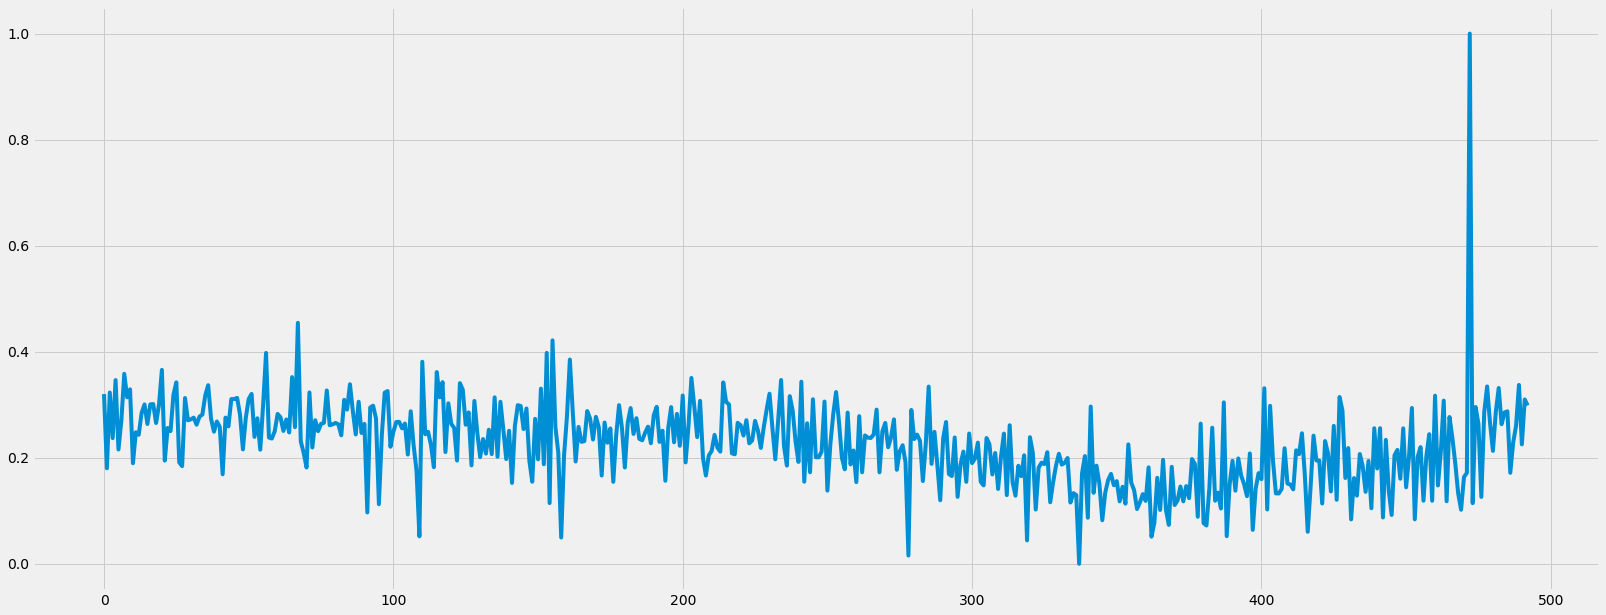

In [20]:
#get the root mean squared error (RMSE)
error = []
error.append(predictions - y_test)
nperr = np.array(predictions - y_test)
scaled_error = scaler.fit_transform(nperr)
#print(nperr)
plt.figure(figsize=(25,10))
plt.plot(scaled_error)
#plt.show()
rmse =  np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)
#print(predictions)

In [21]:
#THE ERROR MODEL
nperr.shape

training_errdata_len = math.ceil(len(nperr)*0.8)
training_errdata_len


395

In [22]:
#Scale the error data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_errdata = scaler.fit_transform(nperr)


In [23]:
#creating the error training data set
#create the scaled training data set
train_errdata = scaled_errdata[0:training_errdata_len,:]
#split the data into x_errtrain and y_errtrain data sets
x_errtrain = []
y_errtrain = []
for i in range(60, len(train_errdata)):
    x_errtrain.append(train_errdata[i-60:i,0])
    y_errtrain.append(train_errdata[i,0])
    if i<=61:
        print(x_errtrain)
        print(y_errtrain)
        print()

[array([0.320119  , 0.18014499, 0.32305087, 0.23697171, 0.34645202,
       0.21557455, 0.2706762 , 0.35831015, 0.31393259, 0.32906271,
       0.18961439, 0.24810541, 0.24346821, 0.28464255, 0.30059631,
       0.263659  , 0.3007247 , 0.30125182, 0.26554204, 0.29974936,
       0.36569635, 0.19461988, 0.2561793 , 0.25033859, 0.31902257,
       0.34223343, 0.19114774, 0.18419044, 0.3126576 , 0.27060886,
       0.272427  , 0.27563108, 0.26230937, 0.27766452, 0.28145377,
       0.31786338, 0.33686924, 0.27363709, 0.24915023, 0.26842001,
       0.25827908, 0.16884644, 0.27573816, 0.25914976, 0.31063173,
       0.31071822, 0.31291208, 0.28178489, 0.21581474, 0.27530325,
       0.31070964, 0.32040751, 0.23933084, 0.27444043, 0.21521041,
       0.30082892, 0.39771839, 0.23810788, 0.23627144, 0.25004407])]
[0.28261353483945373]

[array([0.320119  , 0.18014499, 0.32305087, 0.23697171, 0.34645202,
       0.21557455, 0.2706762 , 0.35831015, 0.31393259, 0.32906271,
       0.18961439, 0.24810541, 0.24

In [24]:
#Convert the X_errtrain and Y_errtrain to numpy arrays
x_errtrain , y_errtrain = np.array(x_errtrain), np.array(y_errtrain)

In [25]:
#Reshape the error data
x_errtrain = np.reshape(x_errtrain,(x_errtrain.shape[0],x_errtrain.shape[1],1))
x_errtrain.shape

(335, 60, 1)

In [26]:
#Building the LSTM error model
errmodel = Sequential()
errmodel.add(LSTM(50, return_sequences=True, input_shape =(x_errtrain.shape[1],1)))

#adding a fourth fifth layer and some Dropout regularistion
errmodel.add(LSTM(units = 50, return_sequences = True))

#adding a fourth fifth layer and some Dropout regularistion
errmodel.add(LSTM(units = 50, return_sequences = True))

#adding a fourth fifth layer and some Dropout regularistion
errmodel.add(LSTM(units = 50, return_sequences = False))

errmodel.add(Dense(25))
errmodel.add(Dense(1))

In [27]:
#compile the error Model
errmodel.compile(optimizer='adam', loss='mean_squared_error')


In [28]:
#train the error model
errmodel.fit(x_errtrain, y_errtrain, batch_size=32, epochs=ERR_EPOCHS)

Epoch 1/120
11/11 [==============================] - 9s 161ms/step - loss: 0.0152
Epoch 2/120
11/11 [==============================] - 2s 158ms/step - loss: 0.0058
Epoch 3/120
11/11 [==============================] - 2s 164ms/step - loss: 0.0044
Epoch 4/120
11/11 [==============================] - 2s 163ms/step - loss: 0.0043
Epoch 5/120
11/11 [==============================] - 2s 189ms/step - loss: 0.0041
Epoch 6/120
11/11 [==============================] - 2s 156ms/step - loss: 0.0039
Epoch 7/120
11/11 [==============================] - 2s 153ms/step - loss: 0.0037
Epoch 8/120
11/11 [==============================] - 2s 164ms/step - loss: 0.0035
Epoch 9/120
11/11 [==============================] - 2s 161ms/step - loss: 0.0036
Epoch 10/120
11/11 [==============================] - 2s 150ms/step - loss: 0.0034
Epoch 11/120
11/11 [==============================] - 2s 153ms/step - loss: 0.0037
Epoch 12/120
11/11 [==============================] - 2s 154ms/step - loss: 0.0037
Epoch 13/120


Epoch 100/120
11/11 [==============================] - 2s 148ms/step - loss: 0.0035
Epoch 101/120
11/11 [==============================] - 2s 147ms/step - loss: 0.0035
Epoch 102/120
11/11 [==============================] - 2s 148ms/step - loss: 0.0035
Epoch 103/120
11/11 [==============================] - 2s 150ms/step - loss: 0.0033
Epoch 104/120
11/11 [==============================] - 2s 147ms/step - loss: 0.0033
Epoch 105/120
11/11 [==============================] - 2s 146ms/step - loss: 0.0033
Epoch 106/120
11/11 [==============================] - 2s 145ms/step - loss: 0.0033
Epoch 107/120
11/11 [==============================] - 2s 150ms/step - loss: 0.0033
Epoch 108/120
11/11 [==============================] - 2s 147ms/step - loss: 0.0033
Epoch 109/120
11/11 [==============================] - 1s 95ms/step - loss: 0.0033
Epoch 110/120
11/11 [==============================] - 1s 75ms/step - loss: 0.0033
Epoch 111/120
11/11 [==============================] - 1s 75ms/step - loss: 0.

In [29]:
#create the testing error data set
#create a new array containing scaled values 
test_errdata = scaled_errdata[training_errdata_len - 60: , :]
#create the data sets x_errtest adn y_errtest
x_errtest = []
y_errtest = nperr[training_errdata_len:,:]
for i in range(60, len(test_errdata)):
    x_errtest.append(test_errdata[i-60:i,0])


In [30]:
#convert the error data to a numpy array
x_errtest = np.array(x_errtest)



In [31]:
#resahpe the error data
x_errtest = np.reshape(x_errtest,(x_errtest.shape[0],x_errtest.shape[1],1))


In [32]:
#get the models predicted error values
errpredictions = errmodel.predict(x_errtest)
errpredictions = scaler.inverse_transform(errpredictions)

(98, 1)


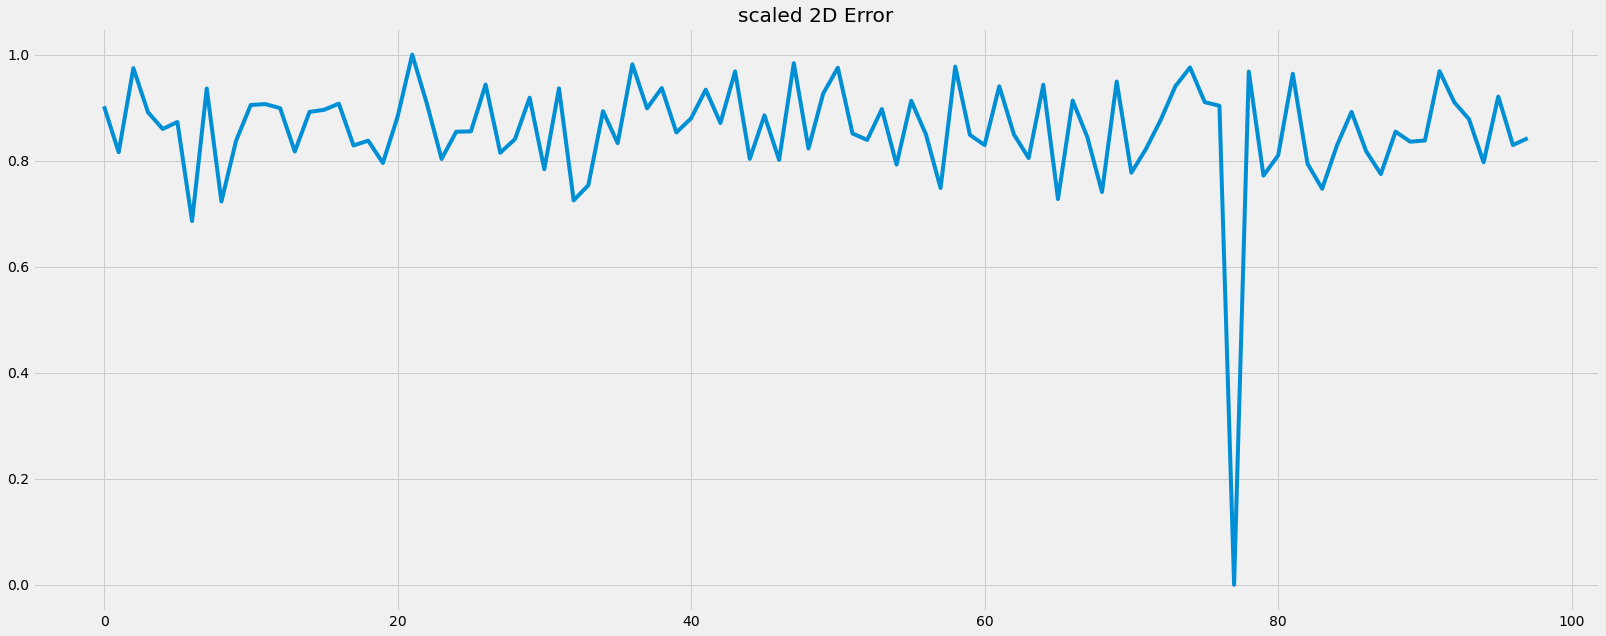

1.341461106222503


In [33]:
#get the root mean squared error (RMSE)
error2d = []
print(errpredictions.shape)
error2d.append(errpredictions - y_errtest)
nperr2d = np.array(errpredictions - y_errtest)
scaled_error2d = scaler.fit_transform(nperr2d)
#print(nperr)
plt.figure(figsize=(25,10))
plt.plot(scaled_error2d)
plt.title('scaled 2D Error')
plt.show()
rmse2d =  np.sqrt(np.mean(errpredictions - y_errtest)**2)
print(rmse2d)
#print(errpredictions)

(493, 1)
         Error  Error Predictions    Error2d
395 -19.026764         -15.889935   3.136829
396 -10.428619         -15.764011  -5.335392
397 -25.816986         -15.641724  10.175262
398 -17.551910         -15.531975   2.019936
399 -14.400360         -15.443226  -1.042866
..         ...                ...        ...
488  -4.850342          -4.065962   0.784379
489   3.358017          -3.840222  -7.198239
490  -8.606064          -3.678573   4.927490
491   0.438309          -3.574484  -4.012792
492  -0.771072          -3.517402  -2.746330

[98 rows x 3 columns]


C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


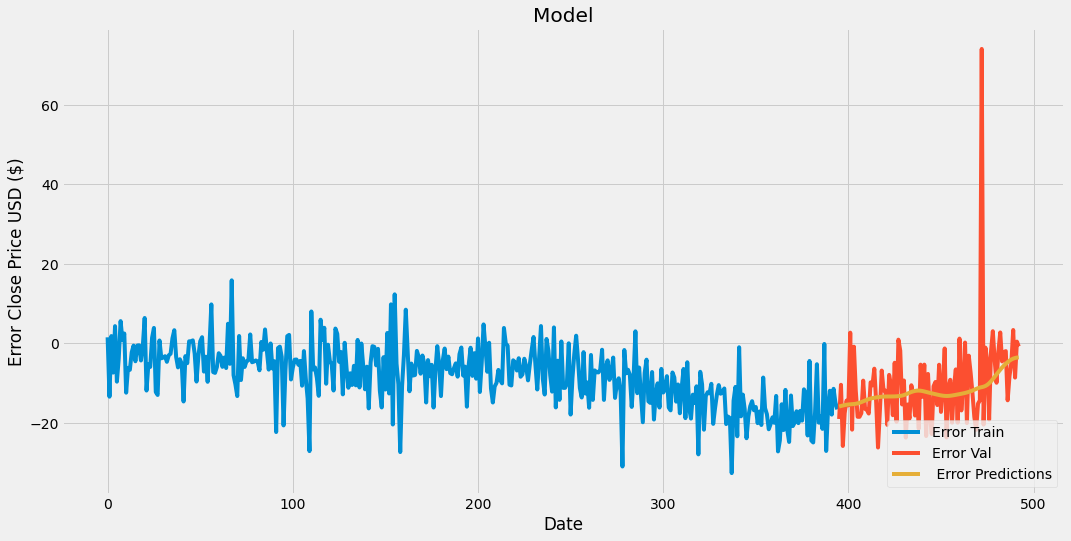

In [34]:
#plot the error data
print(nperr.shape)
dfnperr = pd.DataFrame(nperr, columns = ['Error'])
errtrain = dfnperr[:training_errdata_len]
errvalid = dfnperr[training_errdata_len:]
errvalid['Error Predictions'] = errpredictions
errvalid['Error2d'] = nperr2d
print(errvalid)
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Error Close Price USD ($)')
plt.plot(errtrain['Error'])
plt.plot(errvalid[['Error', 'Error Predictions']])
plt.legend(['Error Train', 'Error Val', ' Error Predictions'], loc='lower right')
plt.show()

C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


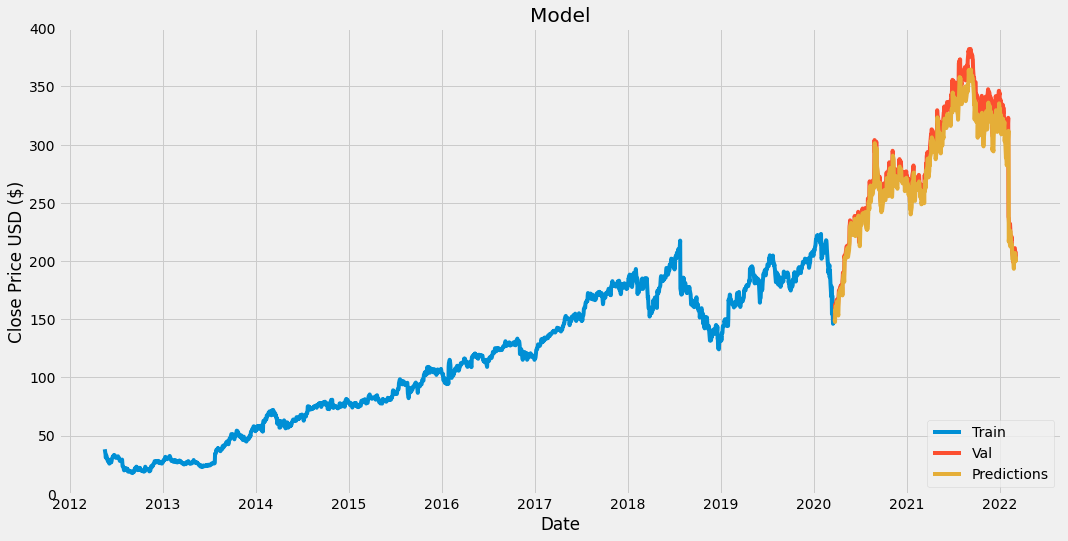

In [35]:
#plot the date
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Error'] = nperr
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [36]:
#show the valid and predicted prices
valid

,Close,Predictions,Error
Date,,,
2020-03-23,148.100006,149.621811,1.521805
2020-03-24,160.979996,147.562653,-13.417343
2020-03-25,156.210007,158.044724,1.834717
2020-03-26,163.339996,155.987656,-7.352341
2020-03-27,156.789993,161.122269,4.332275
...,...,...,...
2022-02-28,211.029999,206.179657,-4.850342
2022-03-01,203.490005,206.848022,3.358017
2022-03-02,208.110001,199.503937,-8.606064


In [37]:
#get the Quote
apple_quote = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=END_DATE)
#create new data frame
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
last_60_days_error = dfnperr[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
last_60_days_scaled_error = scaler.transform(last_60_days_error)
#create the empty list
x_test = []
x_errtest=[]
#append the past 60 days
x_test.append(last_60_days_scaled)
x_errtest.append(last_60_days_scaled_error)
#convert the x_test data set to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

x_errtest = np.array(x_errtest)
x_errtest = np.reshape(x_errtest,(x_errtest.shape[0],x_errtest.shape[1],1))

#get the predicted scaled price
pred_price = model.predict(x_test)
pred_error = model.predict(x_errtest)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
pred_error = scaler.inverse_transform(pred_error)
print(pred_price)
print(pred_error)
new_df.tail()
dfnperr.tail()

[[137.75409]]
[[-3.956247]]


,Error
488,-4.850342
489,3.358017
490,-8.606064
491,0.438309
492,-0.771072


In [38]:
print("Prediction with 1-degree of correction")
print(pred_price[0][0]-pred_error[0][0])

Prediction with 1-degree of correction
141.71034


In [39]:
apple_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start='2022-03-04', end=PREDICT_DATE)
print(apple_quote2['Close'])

Date
2022-03-03    202.970001
2022-03-04    200.059998
Name: Close, dtype: float64


In [40]:
import joblib

joblib.dump(model,model_path)
    


INFO:tensorflow:Assets written to: ram://1a2cedcd-8008-4f8c-ab00-84962b51262e/assets


INFO:tensorflow:Assets written to: ram://1a2cedcd-8008-4f8c-ab00-84962b51262e/assets


['machine learning model/FB_model.pkl']

In [41]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)